This notebook assumes you are using sims_maf version >= 1.1, and have 'setup sims_maf' in your shell. 

This notebook shows how MAF can use the LSST camera geometry to decide if a region has been observed.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import lsst.sims.maf.slicers as slicers
import lsst.sims.maf.metrics as metrics
import lsst.sims.maf.metricBundles as metricBundles
import lsst.sims.maf.db as db
from lsst.sims.maf.plots import PlotHandler
import healpy as hp

In [2]:
# Set the database and query
database = 'enigma_1189_sqlite.db'
sqlWhere = 'filter = "r" and night < 400 and fieldRA < %f and fieldDec > %f and fieldDec < 0' % (np.radians(15), np.radians(-15))
opsdb = db.OpsimDatabase(database)
outDir = 'Camera'
resultsDb = db.ResultsDb(outDir=outDir)

In [3]:
nside=512
metric = metrics.CountMetric('expMJD')
slicer = slicers.HealpixSlicer(nside=nside)
slicer2 = slicers.HealpixSlicer(nside=nside, useCamera=True, radius=1.9)
summaryMetrics = [metrics.SumMetric()]

Healpix slicer using NSIDE=512, approximate resolution 6.870973 arcminutes
Healpix slicer using NSIDE=512, approximate resolution 6.870973 arcminutes


In [4]:
bundle1 = metricBundles.MetricBundle(metric,slicer,sqlWhere, summaryMetrics=summaryMetrics)
bundle2 = metricBundles.MetricBundle(metric,slicer2,sqlWhere, summaryMetrics=summaryMetrics)
bg = metricBundles.MetricBundleGroup({'NoCamera':bundle1, 'WithCamera':bundle2},opsdb, outDir=outDir, resultsDb=resultsDb)
bg.runAll()

Querying database with constraint filter = "r" and night < 400 and fieldRA < 0.261799 and fieldDec > -0.261799 and fieldDec < 0
Found 270 visits
Running:  ['NoCamera']
Completed metric generation.
Running:  ['WithCamera']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.


Config override file '/Users/yoachim/lsst/DarwinX86/obs_lsstSim/w.2015.33/description/camera/camera.py' appears to use 'root' instead of 'config'; trying with 'root'

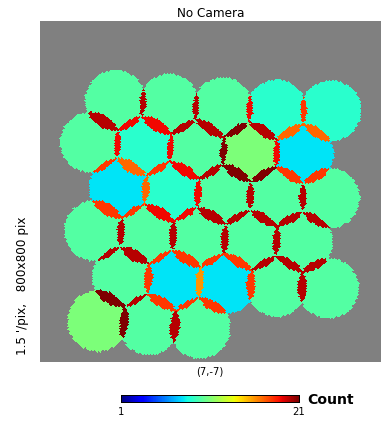

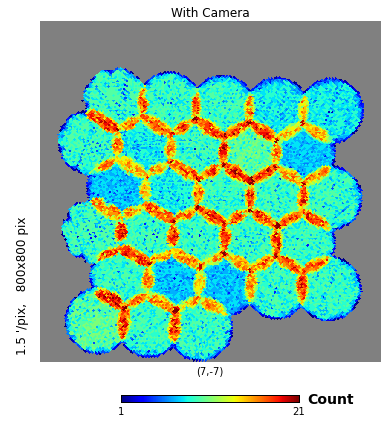

In [5]:

hp.gnomview(bundle1.metricValues, xsize=800,ysize=800, rot=(7,-7,0), title='No Camera', unit='Count', min=1,max=21)
hp.gnomview(bundle2.metricValues, xsize=800,ysize=800, rot=(7,-7,0),title='With Camera', unit='Count', min=1,max=21)

In [6]:
# Print the number of pixel observations in the 2 cases. Note that running without the camera is about 3-4% optimistic.
print bundle1.summaryValues
print bundle2.summaryValues

{'Sum': 198053.0}
{'Sum': 190987.0}


Now to try it again with dithering turned on

In [7]:
sqlWhere = 'filter = "r" and night < 400 and ditheredRA < %f and ditheredDec > %f and ditheredDec < 0' % (np.radians(15), np.radians(-15))
slicer = slicers.HealpixSlicer(latCol='ditheredDec', lonCol='ditheredRA', nside=nside)
slicer2 = slicers.HealpixSlicer(latCol='ditheredDec', lonCol='ditheredRA',nside=nside, useCamera=True, radius=1.9)
bundle1 = metricBundles.MetricBundle(metric,slicer,sqlWhere, summaryMetrics=summaryMetrics)
bundle2 = metricBundles.MetricBundle(metric,slicer2,sqlWhere, summaryMetrics=summaryMetrics)
bg = metricBundles.MetricBundleGroup({'NoCamera':bundle1, 'WithCamera':bundle2},opsdb, outDir=outDir, resultsDb=resultsDb)
bg.runAll()

Healpix slicer using NSIDE=512, approximate resolution 6.870973 arcminutes
Healpix slicer using NSIDE=512, approximate resolution 6.870973 arcminutes
Querying database with constraint filter = "r" and night < 400 and ditheredRA < 0.261799 and ditheredDec > -0.261799 and ditheredDec < 0
Found 253 visits
Running:  ['NoCamera']
Completed metric generation.
Running:  ['WithCamera']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.


Config override file '/Users/yoachim/lsst/DarwinX86/obs_lsstSim/w.2015.33/description/camera/camera.py' appears to use 'root' instead of 'config'; trying with 'root'

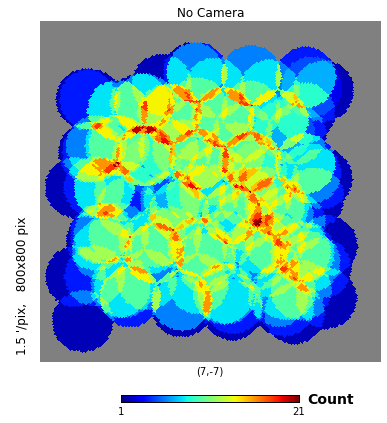

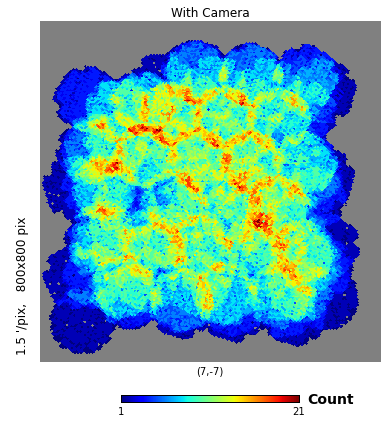

In [8]:

hp.gnomview(bundle1.metricValues, xsize=800,ysize=800, rot=(7,-7,0), title='No Camera', unit='Count', min=1,max=21)
hp.gnomview(bundle2.metricValues, xsize=800,ysize=800, rot=(7,-7,0),title='With Camera', unit='Count', min=1,max=21)

Healpix slicer using NSIDE=512, approximate resolution 6.870973 arcminutes
Healpix slicer using NSIDE=512, approximate resolution 6.870973 arcminutes
Querying database with constraint filter = "r" and ditheredRA < 0.261799 and ditheredDec > -0.261799 and ditheredDec < 0
Found 5681 visits
Running:  ['NoCamera']
Completed metric generation.
Running:  ['WithCamera']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.


Config override file '/Users/yoachim/lsst/DarwinX86/obs_lsstSim/w.2015.33/description/camera/camera.py' appears to use 'root' instead of 'config'; trying with 'root'

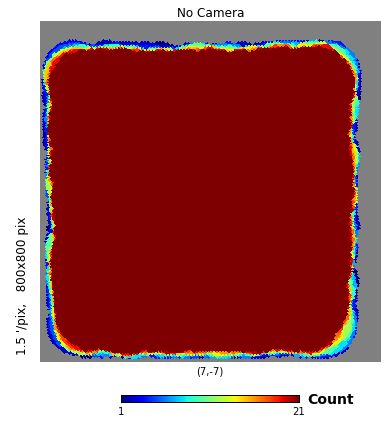

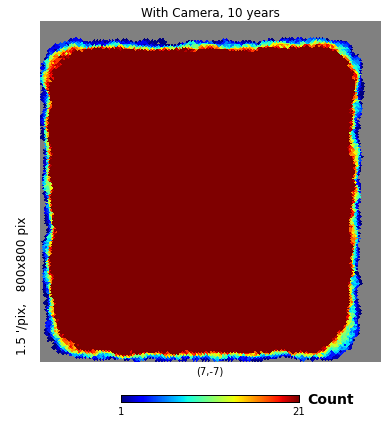

In [9]:
sqlWhere = 'filter = "r" and ditheredRA < %f and ditheredDec > %f and ditheredDec < 0' % (np.radians(15), np.radians(-15))
slicer = slicers.HealpixSlicer(latCol='ditheredDec', lonCol='ditheredRA', nside=nside)
slicer2 = slicers.HealpixSlicer(latCol='ditheredDec', lonCol='ditheredRA',nside=nside, useCamera=True, radius=1.9)
bundle1 = metricBundles.MetricBundle(metric,slicer,sqlWhere, summaryMetrics=summaryMetrics)
bundle2 = metricBundles.MetricBundle(metric,slicer2,sqlWhere, summaryMetrics=summaryMetrics)
bg = metricBundles.MetricBundleGroup({'NoCamera':bundle1, 'WithCamera':bundle2},opsdb, outDir=outDir, resultsDb=resultsDb)
bg.runAll()


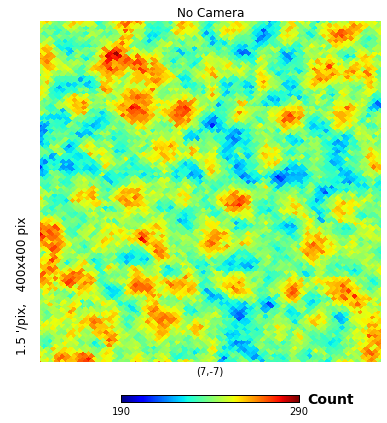

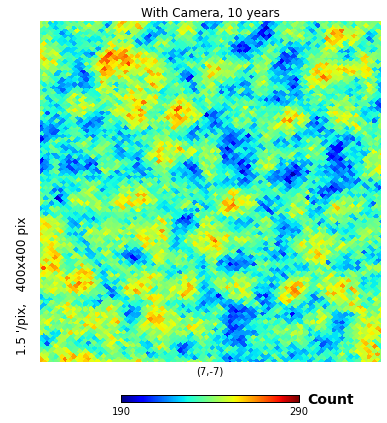

In [14]:
hp.gnomview(bundle1.metricValues, xsize=400,ysize=400, rot=(7,-7,0), title='No Camera', unit='Count', min=190, max=290)
hp.gnomview(bundle2.metricValues, xsize=400,ysize=400, rot=(7,-7,0),title='With Camera, 10 years', unit='Count', min=190, max=290)

In [4]:
# Let's do this for a hybrid focal plane
raftDict = {'R:1,0':1,
            'R:2,0':2 ,
            'R:3,0':3 ,
            'R:0,1':4 ,
            'R:1,1':5 ,
            'R:2,1':6 ,
            'R:3,1':7 ,
            'R:4,1':8 ,
            'R:0,2':9 ,
            'R:1,2':10,
            'R:2,2':11,
            'R:3,2':12,
            'R:4,2':13,
            'R:0,3':14,
            'R:1,3':15,
            'R:2,3':16,
            'R:3,3':17,
            'R:4,3':18,
            'R:1,4':19,
            'R:2,4':20,
            'R:3,4':21}

sensors = ['S:0,0', 'S:0,1', 'S:0,2',
           'S:1,0', 'S:1,1', 'S:1,2',
           'S:2,0', 'S:2,1', 'S:2,2',]


raftReverseDict = {}
for key in raftDict:
    raftReverseDict[raftDict[key]] = key
raftConfigs = {'A':{'rafts2':[1,3,4,6,8,10,12,14,16,18,19,21], 'rafts1':[2,5,7,9,11,13,15,17,20]},
               'B':{'rafts2':[7,8,11,12,13,15,16,17,18,19,20,21], 'rafts1':[1,2,3,4,5,6,9,10,14]}}

raftConfig = 'A'
rafts1 = []
rafts2 = []
for indx in raftConfigs[raftConfig]['rafts1']:
    rafts1.append(raftReverseDict[indx])

for indx in raftConfigs[raftConfig]['rafts2']:
    rafts2.append(raftReverseDict[indx])

chips1 = []
for raft in rafts1:
    for sensor in sensors:
        chips1.append(raft+' '+sensor)

chips2 = []
for raft in rafts2:
    for sensor in sensors:
        chips2.append(raft+' '+sensor)



In [6]:
# Dithering on
sqlWhere = 'filter = "u" and night < 365 and ditheredRA < %f and ditheredDec > %f and ditheredDec < 0' % (np.radians(15), np.radians(-15))
slicer = slicers.HealpixSlicer(latCol='ditheredDec', lonCol='ditheredRA', nside=nside)
slicer2 = slicers.HealpixSlicer(latCol='ditheredDec', lonCol='ditheredRA',nside=nside, useCamera=True, chipNames=chips2)
bundle1 = metricBundles.MetricBundle(metric,slicer,sqlWhere, summaryMetrics=summaryMetrics)
bundle2 = metricBundles.MetricBundle(metric,slicer2,sqlWhere, summaryMetrics=summaryMetrics)
bg = metricBundles.MetricBundleGroup({'NoCamera':bundle1, 'WithCamera':bundle2},opsdb, outDir=outDir, resultsDb=resultsDb)
bg.runAll()

Healpix slicer using NSIDE=512, approximate resolution 6.870973 arcminutes
Healpix slicer using NSIDE=512, approximate resolution 6.870973 arcminutes
Querying database with constraint filter = "u" and night < 365 and ditheredRA < 0.261799 and ditheredDec > -0.261799 and ditheredDec < 0
Found 87 visits
Running:  ['NoCamera']
Completed metric generation.
Running:  ['WithCamera']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.


Config override file '/Users/yoachim/lsst/DarwinX86/obs_lsstSim/w.2015.33/description/camera/camera.py' appears to use 'root' instead of 'config'; trying with 'root'

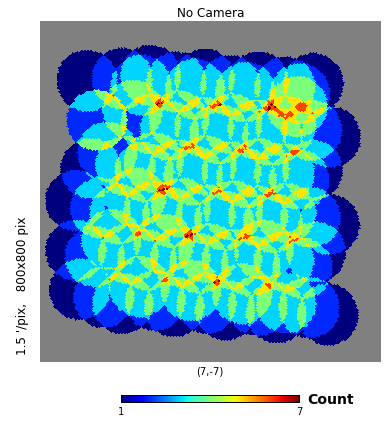

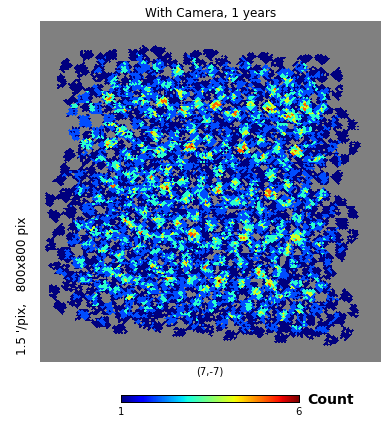

In [7]:
hp.gnomview(bundle1.metricValues, xsize=800,ysize=800, rot=(7,-7,0), title='No Camera', unit='Count')
hp.gnomview(bundle2.metricValues, xsize=800,ysize=800, rot=(7,-7,0),title='With Camera, 1 years', unit='Count')

Healpix slicer using NSIDE=512, approximate resolution 6.870973 arcminutes
Healpix slicer using NSIDE=512, approximate resolution 6.870973 arcminutes
Querying database with constraint filter = "u" and night < 730 and ditheredRA < 0.261799 and ditheredDec > -0.261799 and ditheredDec < 0
Found 267 visits
Running:  ['NoCamera']
Completed metric generation.
Running:  ['WithCamera']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.


Config override file '/Users/yoachim/lsst/DarwinX86/obs_lsstSim/w.2015.33/description/camera/camera.py' appears to use 'root' instead of 'config'; trying with 'root'

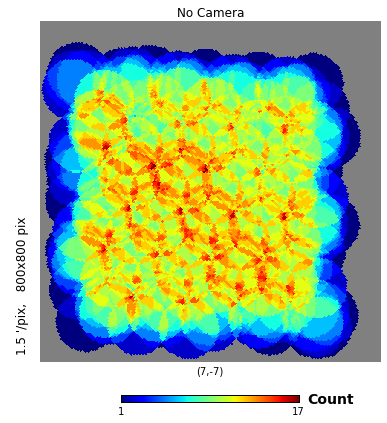

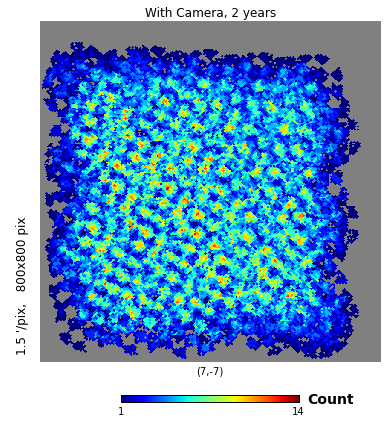

In [8]:
# Dithering on
sqlWhere = 'filter = "u" and night < 730 and ditheredRA < %f and ditheredDec > %f and ditheredDec < 0' % (np.radians(15), np.radians(-15))
slicer = slicers.HealpixSlicer(latCol='ditheredDec', lonCol='ditheredRA', nside=nside)
slicer2 = slicers.HealpixSlicer(latCol='ditheredDec', lonCol='ditheredRA',nside=nside, useCamera=True, chipNames=chips2)
bundle1 = metricBundles.MetricBundle(metric,slicer,sqlWhere, summaryMetrics=summaryMetrics)
bundle2 = metricBundles.MetricBundle(metric,slicer2,sqlWhere, summaryMetrics=summaryMetrics)
bg = metricBundles.MetricBundleGroup({'NoCamera':bundle1, 'WithCamera':bundle2},opsdb, outDir=outDir, resultsDb=resultsDb)
bg.runAll()
hp.gnomview(bundle1.metricValues, xsize=800,ysize=800, rot=(7,-7,0), title='No Camera', unit='Count')
hp.gnomview(bundle2.metricValues, xsize=800,ysize=800, rot=(7,-7,0),title='With Camera, 2 years', unit='Count')

In [9]:
# Dithering off
sqlWhere = 'filter = "u" and night < 730 and fieldRA < %f and fieldDec > %f and fieldDec < 0' % (np.radians(15), np.radians(-15))
slicer = slicers.HealpixSlicer(latCol='fieldDec', lonCol='fieldRA', nside=nside)
slicer2 = slicers.HealpixSlicer(latCol='fieldDec', lonCol='fieldRA',nside=nside, useCamera=True, chipNames=chips2)
bundle1 = metricBundles.MetricBundle(metric,slicer,sqlWhere, summaryMetrics=summaryMetrics)
bundle2 = metricBundles.MetricBundle(metric,slicer2,sqlWhere, summaryMetrics=summaryMetrics)
bg = metricBundles.MetricBundleGroup({'NoCamera':bundle1, 'WithCamera':bundle2},opsdb, outDir=outDir, resultsDb=resultsDb)
bg.runAll()


Healpix slicer using NSIDE=512, approximate resolution 6.870973 arcminutes
Healpix slicer using NSIDE=512, approximate resolution 6.870973 arcminutes
Querying database with constraint filter = "u" and night < 730 and fieldRA < 0.261799 and fieldDec > -0.261799 and fieldDec < 0
Found 252 visits
Running:  ['NoCamera']
Completed metric generation.
Running:  ['WithCamera']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.


Config override file '/Users/yoachim/lsst/DarwinX86/obs_lsstSim/w.2015.33/description/camera/camera.py' appears to use 'root' instead of 'config'; trying with 'root'

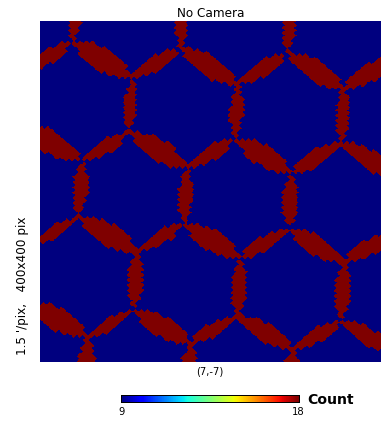

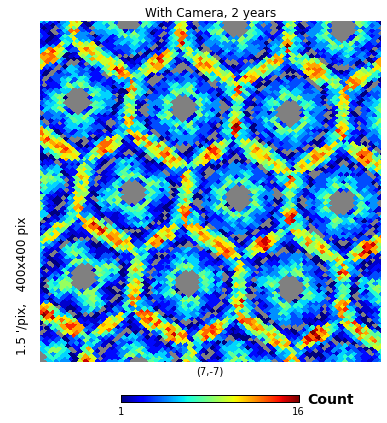

In [10]:
hp.gnomview(bundle1.metricValues, xsize=400,ysize=400, rot=(7,-7,0), title='No Camera', unit='Count')
hp.gnomview(bundle2.metricValues, xsize=400,ysize=400, rot=(7,-7,0),title='With Camera, 2 years', unit='Count')

In [11]:
raftConfig = 'B'
rafts1 = []
rafts2 = []
for indx in raftConfigs[raftConfig]['rafts1']:
    rafts1.append(raftReverseDict[indx])

for indx in raftConfigs[raftConfig]['rafts2']:
    rafts2.append(raftReverseDict[indx])

chips1 = []
for raft in rafts1:
    for sensor in sensors:
        chips1.append(raft+' '+sensor)

chips2 = []
for raft in rafts2:
    for sensor in sensors:
        chips2.append(raft+' '+sensor)



In [12]:
# Dithering on
sqlWhere = 'filter = "u" and night < 365 and ditheredRA < %f and ditheredDec > %f and ditheredDec < 0' % (np.radians(15), np.radians(-15))
slicer = slicers.HealpixSlicer(latCol='ditheredDec', lonCol='ditheredRA', nside=nside)
slicer2 = slicers.HealpixSlicer(latCol='ditheredDec', lonCol='ditheredRA',nside=nside, useCamera=True, chipNames=chips2)
bundle1 = metricBundles.MetricBundle(metric,slicer,sqlWhere, summaryMetrics=summaryMetrics)
bundle2 = metricBundles.MetricBundle(metric,slicer2,sqlWhere, summaryMetrics=summaryMetrics)
bg = metricBundles.MetricBundleGroup({'NoCamera':bundle1, 'WithCamera':bundle2},opsdb, outDir=outDir, resultsDb=resultsDb)
bg.runAll()


Healpix slicer using NSIDE=512, approximate resolution 6.870973 arcminutes
Healpix slicer using NSIDE=512, approximate resolution 6.870973 arcminutes
Querying database with constraint filter = "u" and night < 365 and ditheredRA < 0.261799 and ditheredDec > -0.261799 and ditheredDec < 0
Found 87 visits
Running:  ['NoCamera']
Completed metric generation.
Running:  ['WithCamera']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.


Config override file '/Users/yoachim/lsst/DarwinX86/obs_lsstSim/w.2015.33/description/camera/camera.py' appears to use 'root' instead of 'config'; trying with 'root'

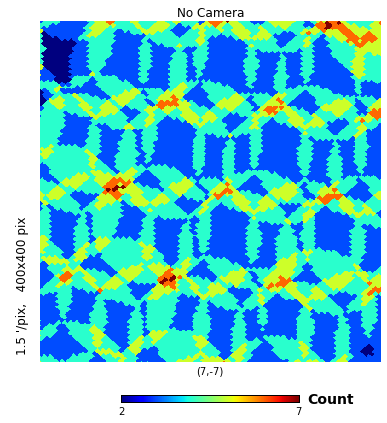

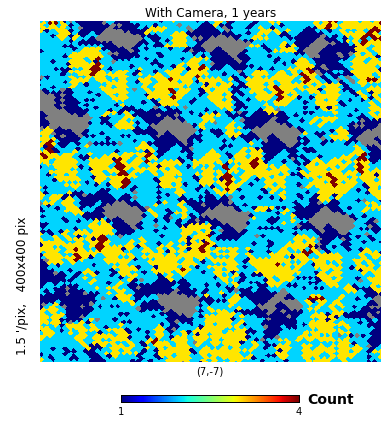

In [13]:
hp.gnomview(bundle1.metricValues, xsize=400,ysize=400, rot=(7,-7,0), title='No Camera', unit='Count')
hp.gnomview(bundle2.metricValues, xsize=400,ysize=400, rot=(7,-7,0),title='With Camera, 1 years', unit='Count')

Healpix slicer using NSIDE=512, approximate resolution 6.870973 arcminutes
Healpix slicer using NSIDE=512, approximate resolution 6.870973 arcminutes
Querying database with constraint filter = "u" and night < 730 and ditheredRA < 0.261799 and ditheredDec > -0.261799 and ditheredDec < 0
Found 267 visits
Running:  ['NoCamera']
Completed metric generation.
Running:  ['WithCamera']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.


Config override file '/Users/yoachim/lsst/DarwinX86/obs_lsstSim/w.2015.33/description/camera/camera.py' appears to use 'root' instead of 'config'; trying with 'root'

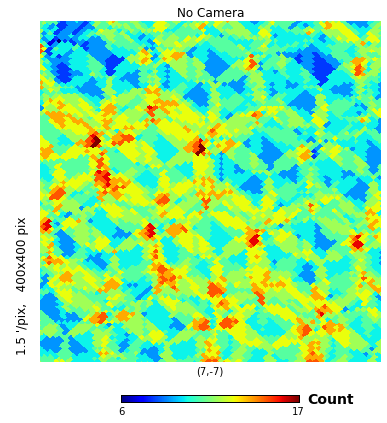

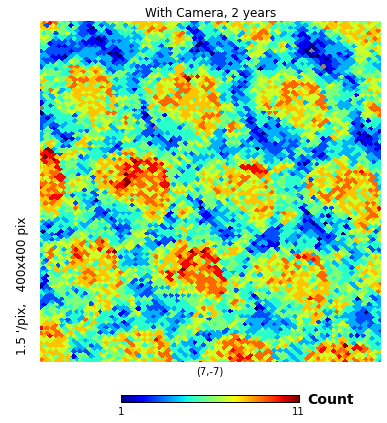

In [14]:
# Dithering on
sqlWhere = 'filter = "u" and night < 730 and ditheredRA < %f and ditheredDec > %f and ditheredDec < 0' % (np.radians(15), np.radians(-15))
slicer = slicers.HealpixSlicer(latCol='ditheredDec', lonCol='ditheredRA', nside=nside)
slicer2 = slicers.HealpixSlicer(latCol='ditheredDec', lonCol='ditheredRA',nside=nside, useCamera=True, chipNames=chips2)
bundle1 = metricBundles.MetricBundle(metric,slicer,sqlWhere, summaryMetrics=summaryMetrics)
bundle2 = metricBundles.MetricBundle(metric,slicer2,sqlWhere, summaryMetrics=summaryMetrics)
bg = metricBundles.MetricBundleGroup({'NoCamera':bundle1, 'WithCamera':bundle2},opsdb, outDir=outDir, resultsDb=resultsDb)
bg.runAll()
hp.gnomview(bundle1.metricValues, xsize=400,ysize=400, rot=(7,-7,0), title='No Camera', unit='Count')
hp.gnomview(bundle2.metricValues, xsize=400,ysize=400, rot=(7,-7,0),title='With Camera, 2 years', unit='Count')

In [15]:
# Dithering off
sqlWhere = 'filter = "u" and night < 730 and fieldRA < %f and fieldDec > %f and fieldDec < 0' % (np.radians(15), np.radians(-15))
slicer = slicers.HealpixSlicer(latCol='fieldDec', lonCol='fieldRA', nside=nside)
slicer2 = slicers.HealpixSlicer(latCol='fieldDec', lonCol='fieldRA',nside=nside, useCamera=True, chipNames=chips2)
bundle1 = metricBundles.MetricBundle(metric,slicer,sqlWhere, summaryMetrics=summaryMetrics)
bundle2 = metricBundles.MetricBundle(metric,slicer2,sqlWhere, summaryMetrics=summaryMetrics)
bg = metricBundles.MetricBundleGroup({'NoCamera':bundle1, 'WithCamera':bundle2},opsdb, outDir=outDir, resultsDb=resultsDb)
bg.runAll()


Healpix slicer using NSIDE=512, approximate resolution 6.870973 arcminutes
Healpix slicer using NSIDE=512, approximate resolution 6.870973 arcminutes
Querying database with constraint filter = "u" and night < 730 and fieldRA < 0.261799 and fieldDec > -0.261799 and fieldDec < 0
Found 252 visits
Running:  ['NoCamera']
Completed metric generation.
Running:  ['WithCamera']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.


Config override file '/Users/yoachim/lsst/DarwinX86/obs_lsstSim/w.2015.33/description/camera/camera.py' appears to use 'root' instead of 'config'; trying with 'root'

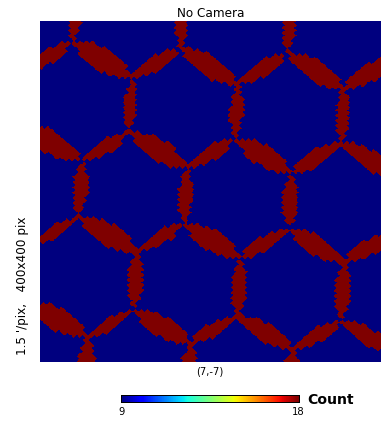

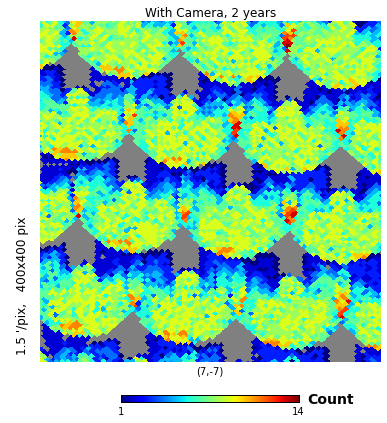

In [16]:
hp.gnomview(bundle1.metricValues, xsize=400,ysize=400, rot=(7,-7,0), title='No Camera', unit='Count')
hp.gnomview(bundle2.metricValues, xsize=400,ysize=400, rot=(7,-7,0),title='With Camera, 2 years', unit='Count')